### Principal Component Analysis 
Even after tons of data reduction, there are still too many variables for a meaningful analysis. We'll reduce to 2 or three dimensions.import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df_pivot = pd.read_csv('data_pivot.csv')

In [ ]:
#scale and drop nulls
df_pivot = StandardScaler().fit_transform(df_pivot)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.fillna(0)

In [4]:
#Create (2D) PCA for the data
pca = PCA(n_components = 2, random_state = 7)
pca_mdl = pca.fit_transform(df_pivot)
pca_df = pd.DataFrame(pca_mdl)

In [9]:
pca_df.head()

,0,1
0,inf,-0.729492
1,inf,4.550781
2,inf,10.445312
3,inf,-3.933594
4,inf,-1.211914


In [6]:
pca_df.dtypes

0    float64
1    float64
dtype: object

In [8]:
pca_df = pca_df.astype('float16')

<AxesSubplot:xlabel='0', ylabel='1'>

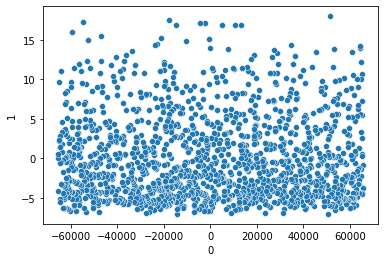

In [10]:
#2d plot
sns.scatterplot(x = pca_df[0], y = pca_df[1])

### Clustering Models
We'll start by using KMeans clustering algorithm on the 2D PCA

In [11]:
from sklearn.cluster import KMeans

In [12]:
#let's see how the number of clusters effects the score 
kmeans_list = [KMeans(n_clusters=n, max_iter=1000, algorithm='auto') for n in range(1,10)]
scores = [kmeans.fit(pca_df).score(pca_df) for kmeans in kmeans_list]

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
plt.plot(range(1,10), scores)
plt.xlabel('Cluster Count')
plt.ylabel('Score')
plt.show()

Looks like 4 clusters would be optimal

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=1000, algorithm='auto')
fit_result = kmeans.fit(pca_df)
preds=kmeans.predict(pca_df)

In [ ]:
plt.scatter(pca_df[0], pca_df[1], c=preds)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red', s=50)
plt.show

Next, let's try the Agglomerative Clustering Model

In [ ]:
from sklearn.cluster import AgglomerativeClustering

pip install -U scikit-learn

In [ ]:
ac = AgglomerativeClustering(n_clusters = 4)

In [ ]:
ac = ac.fit(pca_df)

In [ ]:
plt.scatter(pca_df[0], pca_df[1], c = ac.fit_predict(pca_df))
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [32]:
ac?

Type:        AgglomerativeClustering
String form: AgglomerativeClustering(n_clusters=4)
File:        ~/.local/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py
Docstring:  
Agglomerative Clustering.

Recursively merges pair of clusters of sample data; uses linkage distance.

Read more in the :ref:`User Guide <hierarchical_clustering>`.

Parameters
----------
n_clusters : int or None, default=2
    The number of clusters to find. It must be ``None`` if
    ``distance_threshold`` is not ``None``.

affinity : str or callable, default='euclidean'
    Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
    "manhattan", "cosine", or "precomputed".
    If linkage is "ward", only "euclidean" is accepted.
    If "precomputed", a distance matrix (instead of a similarity matrix)
    is needed as input for the fit method.

memory : str or object with the joblib.Memory interface, default=None
    Used to cache the output of the computation of the tree.
    By default, no

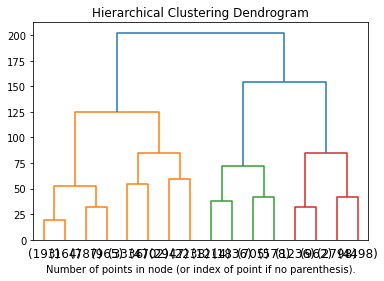

In [55]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(ac, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Interestingly, both KMeans and Agglomerative Clustering resulted in very similar clusters. 

Let's try again in 3D

In [56]:
pca3 = PCA(n_components = 3, random_state = 7)
pca_mdl = pca3.fit_transform(df_pivot)
pca_df = pd.DataFrame(pca_mdl)
pca_df.head()

,0,1,2
0,1.444847,-1.720372,0.177520
1,-0.246303,-1.744884,0.726603
2,1.503002,-1.749399,-0.850699
3,-1.432559,-1.753330,0.121983
4,0.042184,-1.729728,-0.271842


In [58]:
kmeans_list = [KMeans(n_clusters=n, max_iter=1000, algorithm='auto') for n in range(1,20)]
scores = [kmeans.fit(pca_df).score(pca_df) for kmeans in kmeans_list]

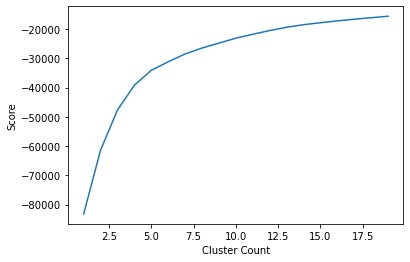

In [59]:
plt.plot(range(1,20), scores)
plt.xlabel('Cluster Count')
plt.ylabel('Score')
plt.show()

Very similar elbow diagram

In [60]:
kmeans = KMeans(n_clusters=5, max_iter=1000, algorithm='auto')
fit_result = kmeans.fit(pca_df)

preds=kmeans.predict(pca_df)

#### 3D KMeans Plot

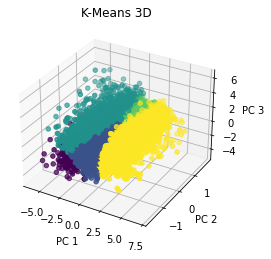

In [63]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

x = pca_df[0]
y = pca_df[1]
z = pca_df[2]

ax.set_xlabel("PC 1") # principle component #1
ax.set_ylabel("PC 2") # principle component #2
ax.set_zlabel("PC 3") # principle component #3

ax.scatter(x, y, z, c = preds)

plt.title('K-Means 3D')

plt.show()

#### 3D Agglomerative Clustering Plot

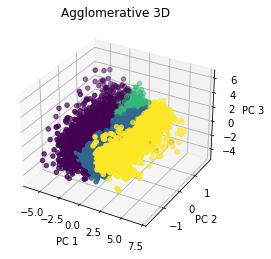

In [64]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

x = pca_df[0]
y = pca_df[1]
z = pca_df[2]

ax.set_xlabel("PC 1") # principle component #1
ax.set_ylabel("PC 2") # principle component #2
ax.set_zlabel("PC 3") # principle component #3

ax.scatter(x, y, z, c = ac.fit_predict(pca_df))

plt.title('Agglomerative 3D')
plt.show()

### Cluster Analysis
Coming in to this project, I imagined using clustering as a sort of recommendation system. I imagined using the clusters to implement collaborative filtering. However, it's hard to say how effective this would be in practice and I think it is beyond the scope of this project to try testing a recommendation system. Based on our "elbow" diagram, it  seemed that 4 clusters was optimal, and that seems to be a very small number if it were to be utilized in a recommendation system. I do think there are other applications that these clusters could be used for such as personalized advertisements (but of course Netflix does not run ads at the moment, but a company like Hulu which as a free subscription with ads could use a similar model). All and all, this is the biggest challenge of clustering. Interpreting the model and its clusters is no easy task.   